# Election
### 19대 대통령 선거의 각 시군별 유권자 수와 각 후보의 득표 수를 담고 있는 csv파일(출처: 통계청)로부터 데이터를 읽어와 가공한 자료입니다.
### 주어진 데이터로부터 전체 투표율과 각 후보의 득표율, 지역별 투표율과 각 후보의 득표율 등을 얻어 그 내용을 도표로 나타내었습니다.
## 목차
#### - 광역시도별 그룹화
#### - 투표율과 후보들의 득표율 추가
#### - 전체 투표율과 각 후보의 득표율
#### - 투표율과 각 후보의 득표율이 최대인 광역시도
#### - 도표 (광역시도별 각 후보의 득표율, 전체 득표율)

In [33]:
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

#### pandas를 import 한 뒤, elec.csv 파일을 읽어 왔습니다.
#### elec.csv 파일은 통계청에서 가져온 19대 대선 관련 자료입니다.
#### 지역별 moon, hong, ahn 세 후보의 득표수 정보를 담고 있는 파일로, pop은 그 지역 전체 유권자 수를 의미합니다.
#### (후보는 moon, hong, ahn 세 후보만 있다고 가정하였습니다.)

In [2]:
pd.read_csv('elec.csv',encoding='cp949', index_col = 0 )

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
...,...,...,...,...,...,...
245,경상남도,산청군,24513,6561,12544,2753
246,경상남도,거창군,41325,11256,19976,4923
247,경상남도,합천군,33021,7143,19699,3077
248,제주특별자치도,제주시,273163,125717,48027,55971


#### 파일을 df라는 변수에 넣고 'pop'이라는 열이름을 '유권자_수'로 바꿔 줍니다.
#### '총_투표수'라는 열을 생성합니다.

In [34]:
df = pd.read_csv('elec.csv',encoding='cp949', index_col = 0 )

In [35]:
df = df.rename(columns = {'pop':'유권자_수'})

In [36]:
df['총_투표수']=df['moon']+df['hong']+df['ahn'] 
df

,광역시도,시군,유권자_수,moon,hong,ahn,총_투표수
0,서울특별시,종로구,102566,42512,22325,22313,87150
1,서울특별시,중구,82852,34062,17901,19372,71335
2,서울특별시,용산구,148157,58081,35230,32109,125420
3,서울특별시,성동구,203175,86686,40566,45674,172926
4,서울특별시,광진구,240030,105512,46368,52824,204704
...,...,...,...,...,...,...,...
245,경상남도,산청군,24513,6561,12544,2753,21858
246,경상남도,거창군,41325,11256,19976,4923,36155
247,경상남도,합천군,33021,7143,19699,3077,29919
248,제주특별자치도,제주시,273163,125717,48027,55971,229715


### 광역시도별 그룹화
#### groupby()와 sum()을 이용해 각 시군별로 나와 있는 데이터를 광역시도별 합계로 나타내고, df_g라는 변수에 담습니다.
#### 열의 순서를 각 후보의 득표수와 총 투표수, 유권자 수 순으로 재배열합니다.

In [37]:
df_g = df.groupby(by='광역시도').sum()
df_g = df_g.iloc[ : , [1,2,3,4,0] ]
df_g

,moon,hong,ahn,총_투표수,유권자_수
광역시도,,,,,
강원도,324768,284909,206840,816517,955885
경기도,3319812,1637345,1807308,6764465,7916009
경상남도,779731,790491,284272,1854494,2135055
경상북도,369726,827237,253905,1450868,1711627
광주광역시,583847,14882,287222,885951,957321
대구광역시,342620,714205,235757,1292582,1581347
대전광역시,404545,191376,218769,814690,945897
부산광역시,872127,720484,378907,1971518,2261633
서울특별시,2781345,1365285,1492767,5639397,6590646


### 투표율과 후보들의 득표율 추가
#### 투표율과 각 후보들의 득표율에 해당하는 열을 계산하여 DataFrame에 추가합니다.

In [38]:
df_rate = (df_g['총_투표수']/df_g['유권자_수'])*100
df_g['투표율']=round(df_rate,1)

In [39]:
df_g['moon_rate'] = round( (df_g['moon']/df_g['총_투표수'])*100, 1)
df_g['hong_rate'] = round( (df_g['hong']/df_g['총_투표수'])*100, 1)
df_g['ahn_rate'] = round( (df_g['ahn']/df_g['총_투표수'])*100, 1)
df_g

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
강원도,324768,284909,206840,816517,955885,85.4,39.8,34.9,25.3
경기도,3319812,1637345,1807308,6764465,7916009,85.5,49.1,24.2,26.7
경상남도,779731,790491,284272,1854494,2135055,86.9,42.0,42.6,15.3
경상북도,369726,827237,253905,1450868,1711627,84.8,25.5,57.0,17.5
광주광역시,583847,14882,287222,885951,957321,92.5,65.9,1.7,32.4
대구광역시,342620,714205,235757,1292582,1581347,81.7,26.5,55.3,18.2
대전광역시,404545,191376,218769,814690,945897,86.1,49.7,23.5,26.9
부산광역시,872127,720484,378907,1971518,2261633,87.2,44.2,36.5,19.2
서울특별시,2781345,1365285,1492767,5639397,6590646,85.6,49.3,24.2,26.5


### 전체 투표율과 각 후보의 득표율

#### 전체 투표율

In [40]:
total_rate = round( (df_g['총_투표수'].sum()/df_g['유권자_수'].sum())*100, 1)
total_rate

86.2

#### moon 후보의 전체 득표율

In [41]:
total_rate_m = round( (df_g['moon'].sum()/df_g['총_투표수'].sum())*100, 1)
total_rate_m

47.5

#### hong 후보의 전체 득표율

In [42]:
total_rate_h = round( (df_g['hong'].sum()/df_g['총_투표수'].sum())*100, 1)
total_rate_h

27.8

#### ahn 후보의 전체 득표율

In [43]:
total_rate_a = round( (df_g['ahn'].sum()/df_g['총_투표수'].sum())*100, 1)
total_rate_a

24.8

### 투표율과 각 후보의 득표율이 최대인 광역시도
#### 먼저, sort_values()를 이용해 데이터를 투표율이 가장 큰 것부터 내림차순으로 정렬해 보았습니다.

In [54]:
df_g.sort_values('투표율', ascending = False)

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
광주광역시,583847,14882,287222,885951,957321,92.5,65.9,1.7,32.4
전라남도,737921,30221,378179,1146321,1238738,92.5,64.4,2.6,33.0
전라북도,778747,40231,285467,1104445,1205794,91.6,70.5,3.6,25.8
부산광역시,872127,720484,378907,1971518,2261633,87.2,44.2,36.5,19.2
세종특별자치시,77767,23211,32010,132988,152801,87.0,58.5,17.5,24.1
경상남도,779731,790491,284272,1854494,2135055,86.9,42.0,42.6,15.3
충청남도,476661,306614,290216,1073491,1240204,86.6,44.4,28.6,27.0
충청북도,374806,255502,211454,841762,975441,86.3,44.5,30.4,25.1
대전광역시,404545,191376,218769,814690,945897,86.1,49.7,23.5,26.9


#### '투표율', 'moon_rate(moon 후보의 득표율)', 'hong_rate(hong 후보의 득표율)', 'ahn_rate(ahn 후보의 득표율)' 의 각 열에서 최대 값을 찾습니다.
#### 각 요소가 최댓값과 같은 행을 추출하여 나타내었습니다.

In [56]:
df_g[( df_g['투표율'] == df_g['투표율'].max() )]

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
광주광역시,583847,14882,287222,885951,957321,92.5,65.9,1.7,32.4
전라남도,737921,30221,378179,1146321,1238738,92.5,64.4,2.6,33.0


In [57]:
df_g[( df_g['moon_rate'] == df_g['moon_rate'].max() )]

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
전라북도,778747,40231,285467,1104445,1205794,91.6,70.5,3.6,25.8


In [58]:
df_g[( df_g['hong_rate'] == df_g['hong_rate'].max() )]

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
경상북도,369726,827237,253905,1450868,1711627,84.8,25.5,57.0,17.5


In [59]:
df_g[( df_g['ahn_rate'] == df_g['ahn_rate'].max() )]

,moon,hong,ahn,총_투표수,유권자_수,투표율,moon_rate,hong_rate,ahn_rate
광역시도,,,,,,,,,
전라남도,737921,30221,378179,1146321,1238738,92.5,64.4,2.6,33.0


## 도표 (광역시도별 각 후보의 득표율, 전체 득표율)
### 광역시도별 각 후보의 득표율
#### 먼저 광역시도별 득표율을 막대 그래프로 나타내기 위해 df_g에서 각 후보의 득표율에 해당하는 열만 추출하여 df_bar라는 변수에 담습니다.

In [47]:
df_bar = df_g[['moon_rate', 'hong_rate', 'ahn_rate']]
df_bar

,moon_rate,hong_rate,ahn_rate
광역시도,,,
강원도,39.8,34.9,25.3
경기도,49.1,24.2,26.7
경상남도,42.0,42.6,15.3
경상북도,25.5,57.0,17.5
광주광역시,65.9,1.7,32.4
대구광역시,26.5,55.3,18.2
대전광역시,49.7,23.5,26.9
부산광역시,44.2,36.5,19.2
서울특별시,49.3,24.2,26.5


#### matplotlib의 plot()함수를 이용해 막대 그래프로 나타냅니다.

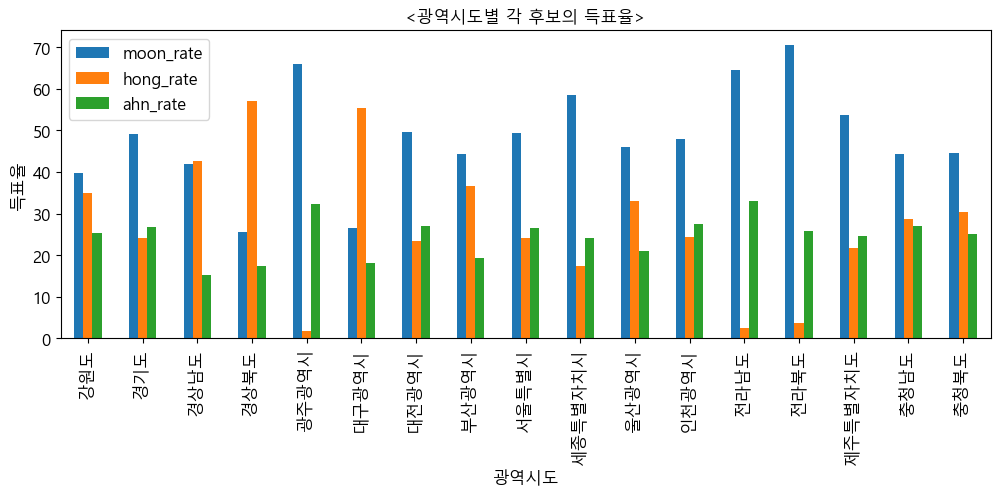

In [73]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

ax = df_bar.plot(kind='bar', title='<광역시도별 각 후보의 득표율>', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('광역시도', fontsize=12)      
ax.set_ylabel('득표율', fontsize=12)    
ax.legend(['moon_rate', 'hong_rate', 'ahn_rate'], fontsize=12)   

### 각 후보의 전체 득표율
#### matplotlib.pyplot의 pie()함수를 이용해 파이 차트를 그려줍니다.

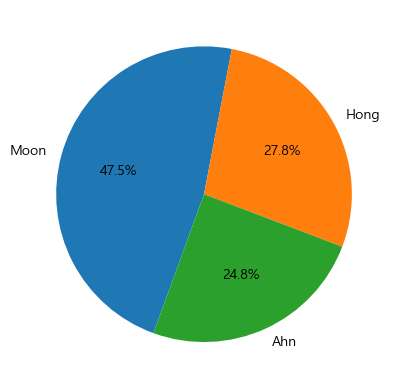

In [71]:
ratio = [ total_rate_m, total_rate_h, total_rate_a ]
labels = ['Moon', 'Hong', 'Ahn']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=250, counterclock=False)
plt.show()